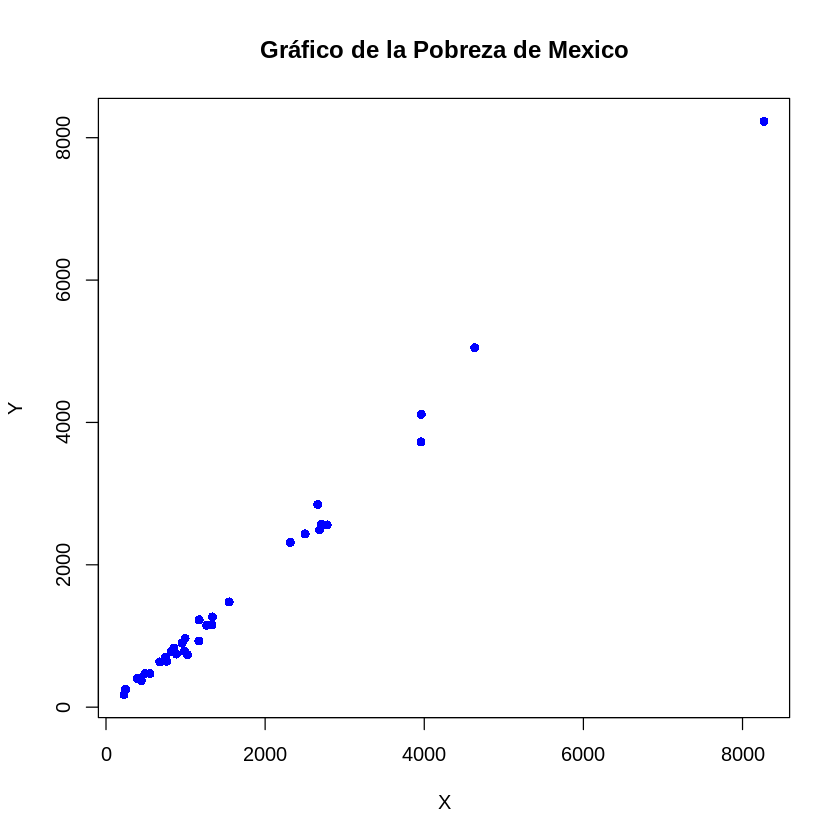

In [ ]:
entidades <- c("Aguascalientes", "Baja California", "Baja California Sur", "Campeche", "Coahuila",
               "Colima", "Chiapas", "Chihuahua", "Distrito Federal", "Durango", "Guanajuato",
               "Guerrero", "Hidalgo", "Jalisco", "México", "Michoacán", "Morelos", "Nayarit",
               "Nuevo León", "Oaxaca", "Puebla", "Querétaro", "Quintana Roo", "San Luis Potosí",
               "Sinaloa", "Sonora", "Tabasco", "Tamaulipas", "Tlaxcala", "Veracruz", "Yucatán",
               "Zacatecas")

# Crear un vector para 2014
x2014 <- c(442.9, 984.9, 226.2, 391.0, 885.8, 244.9, 3961.0, 1265.5, 2502.5, 761.2, 2683.3, 2315.4,
           1547.8, 2780.2, 8269.9, 2708.6, 993.7, 488.8, 1022.7, 2662.7, 3958.8, 675.7, 553.0, 1338.1,
           1167.1, 852.1, 1169.8, 1330.7, 745.1, 4634.2, 957.9, 819.8)

# Crear un vector para 2016
x2016 <- c(369.7, 789.1, 175.6, 405.0, 745.9, 248.7, 4114.0, 1150.0, 2434.4, 643.3, 2489.7, 2314.7,
           1478.8, 2560.6, 8230.2, 2565.9, 965.9, 470.1, 737.8, 2847.3, 3728.2, 635.7, 471.0, 1267.7,
           929.7, 831.4, 1228.1, 1156.2, 701.8, 5049.5, 901.9, 780.3)

# Graficar los datos
plot(x2014, x2016, main = "Gráfico de la Pobreza de Mexico", xlab = "X", ylab = "Y", col = "blue", pch = 16)







In [ ]:
library(ggplot2)

In [ ]:
suma_x <- sum(x2014)
suma_y <- sum(x2016)
suma_x2 <- sum(x2014^2)
suma_y2 <- sum(x2016^2)
suma_xy <- sum(x2014 * x2016)

# Mostrar los resultados
cat("Suma de x:", suma_x, "\n")
cat("Suma de y:", suma_y, "\n")
cat("Suma de x^2:", suma_x2, "\n")
cat("Suma de y^2:", suma_y2, "\n")
cat("Suma de xy:", suma_xy, "\n")

Suma de x: 55341.3 
Suma de y: 53418.2 
Suma de x^2: 181197189 
Suma de y^2: 178530847 
Suma de xy: 179520899 


In [ ]:
RLM<-lm(x2016~x2014)
summary(RLM)


Call:
lm(formula = x2016 ~ x2014)

Residuals:
    Min      1Q  Median      3Q     Max 
-213.52 -102.57    6.26   50.15  419.35 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -93.46671   34.49160   -2.71    0.011 *  
x2014         1.01930    0.01449   70.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 134 on 30 degrees of freedom
Multiple R-squared:  0.994,	Adjusted R-squared:  0.9938 
F-statistic:  4945 on 1 and 30 DF,  p-value: < 2.2e-16


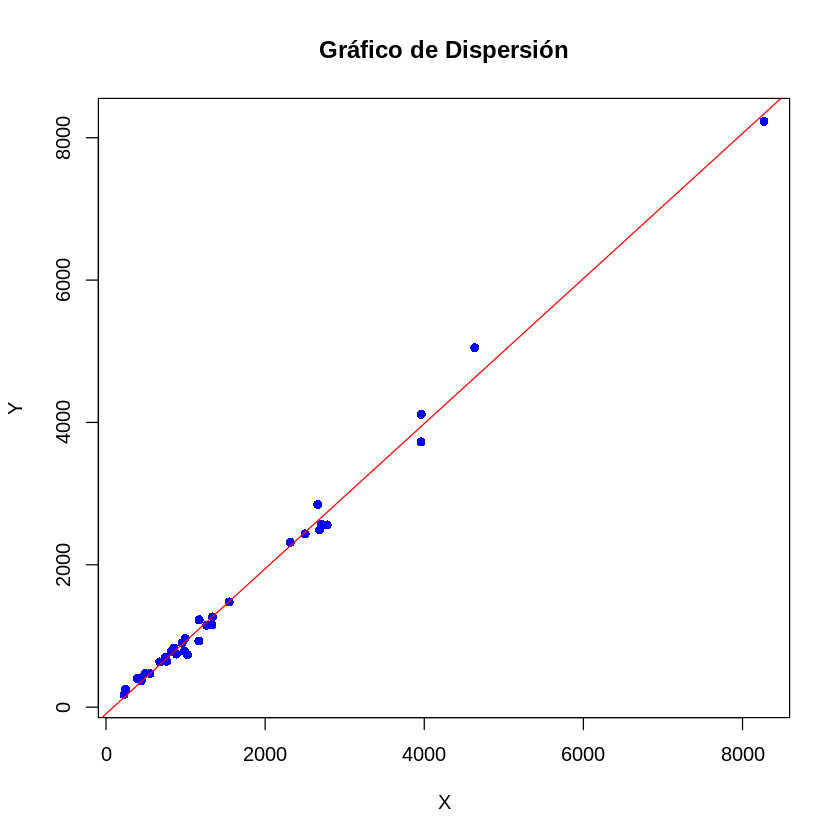

In [ ]:
plot(x2014, x2016, main = "Gráfico de Dispersión", xlab = "X", ylab = "Y", col = "blue", pch = 16)
pendiente <- coef(RLM)[2]
interseccion <- coef(RLM)[1]

# Trazar la línea de regresión
abline(RLM, col = "red")



In [ ]:
resultado_anova <- aov(x2016 ~ x2014)
summary(resultado_anova)

            Df   Sum Sq  Mean Sq F value Pr(>F)    
x2014        1 88820008 88820008    4945 <2e-16 ***
Residuals   30   538837    17961                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
summary_modelo <- summary(RLM)

# Imprimir los errores estándar de los coeficientes
print(summary_modelo$coefficients[, "Std. Error"])

(Intercept)       x2014 
34.49160295  0.01449481 


In [ ]:
confianza_cof<-confint(RLM,level = 0.95)
print(confianza_cof)

                   2.5 %     97.5 %
(Intercept) -163.9079591 -23.025458
x2014          0.9896931   1.048898


In [ ]:
residuos <- residuals(RLM)

# 3. Calcular la media de los residuos
media_residuos <- mean(residuos)

# 4. Realizar una prueba de hipótesis para determinar si la media de los residuos es significativamente diferente de cero
# Puedes usar, por ejemplo, un test t de una muestra
test_t <- t.test(residuos, mu = 0)

# Mostrar la media de los residuos y el resultado del test t
print(paste("Media de los residuos:", media_residuos))
print(test_t)

[1] "Media de los residuos: -2.54679090316845e-15"

	One Sample t-test

data:  residuos
t = -1.0927e-16, df = 31, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -47.53345  47.53345
sample estimates:
    mean of x 
-2.546791e-15 



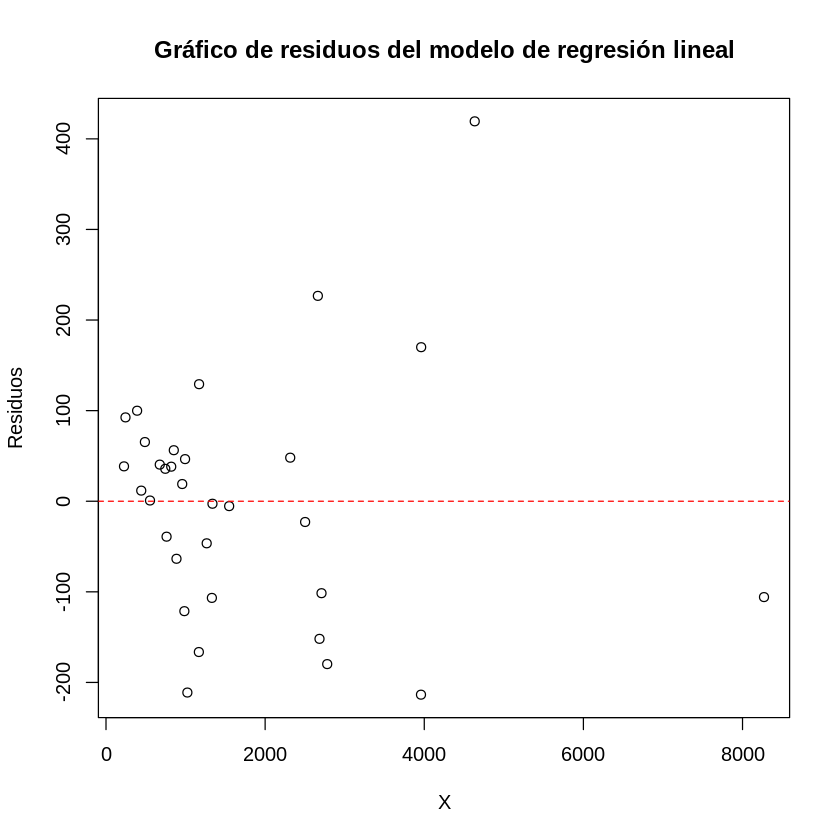

In [ ]:
residuos <- resid(RLM)

# Graficar los residuos
plot(x2014, residuos, xlab = "X", ylab = "Residuos", main = "Gráfico de residuos del modelo de regresión lineal")
abline(h = 0, col = "red", lty = 2)  # Línea horizontal en y = 0

In [ ]:
install.packages("lmtest")
library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
# Realizar la prueba de hipótesis de Durbin-Watson
resultado_dw <- dwtest(RLM)

# Mostrar el resultado de la prueba
print(resultado_dw)


	Durbin-Watson test

data:  RLM
DW = 2.3366, p-value = 0.8253
alternative hypothesis: true autocorrelation is greater than 0



In [ ]:
restultlevel<- bptest(RLM)
print(restultlevel)


	studentized Breusch-Pagan test

data:  RLM
BP = 6.3333, df = 1, p-value = 0.01185



In [ ]:
install.packages("nortest")
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
residuos3 <- residuals(RLM)

# Realizar la prueba de Anderson-Darling
resultado_ad <- ad.test(residuos3)

# Mostrar el resultado de la prueba
print(resultado_ad)


	Anderson-Darling normality test

data:  residuos3
A = 0.4773, p-value = 0.2214



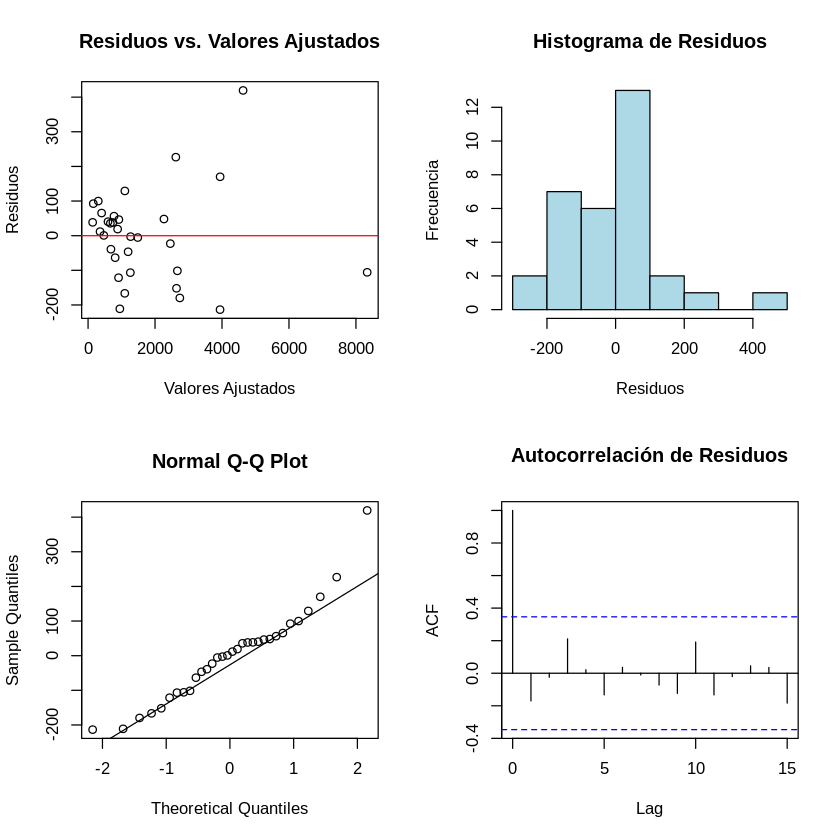

In [ ]:
# Obtener los residuos
residuos <- residuals(RLM)

# Gráficos
par(mfrow=c(2,2))  # Para mostrar varios gráficos en una cuadrícula

# Residuos vs. Valores Ajustados
plot(RLM$fitted.values, residuos, main="Residuos vs. Valores Ajustados", xlab="Valores Ajustados", ylab="Residuos")
abline(h=0, col="red")  # Agregar línea en y=0

# Histograma de Residuos
hist(residuos, main="Histograma de Residuos", xlab="Residuos", ylab="Frecuencia", col="lightblue")

# Gráfico Q-Q
qqnorm(residuos)
qqline(residuos)

# Gráfico de Autocorrelación de Residuos
acf(residuos, main="Autocorrelación de Residuos")

In [ ]:
summary_modelo <- summary(RLM)

# Obtener los errores estándar de los coeficientes b0 y b1
error_estandar_b0 <- summary_modelo$coefficients["(Intercept)", "Std. Error"]
error_estandar_b1 <- summary_modelo$coefficients["x", "Std. Error"]

# Imprimir los errores estándar
cat("Error estándar de b0:", error_estandar_b0, "\n")
cat("Error estándar de b1:", error_estandar_b1, "\n")

ERROR: Error in summary_modelo$coefficients["x", "Std. Error"]: subscript out of bounds


In [ ]:
# Obtener la fórmula del error estándar de ŷ
error_estandar_y_hat <- sqrt(sum(RLM$residuals^2) / (length(RLM$residuals) - 2))

# Calcular los límites de las bandas de confianza del 95% para Y
x_range <- seq(min(datos$x), max(datos$x), length.out = 34)
banda_superior <- predict(RLM, newdata = data.frame(x = x_range), interval = "confidence")[, "upr"]
banda_inferior <- predict(RLM, newdata = data.frame(x = x_range), interval = "confidence")[, "lwr"]

# Graficar la regresión y las bandas de confianza
plot(datos$y, datos$x, xlab = "X", ylab = "Y", main = "Regresión lineal y bandas de confianza", pch = 16)
lines(x_range, predict(RLM, newdata = data.frame(x = x_range)), col = "blue", lwd = 2)  # Línea de regresión
lines(x_range, banda_superior, col = "red", lty = 2)  # Banda superior de confianza
lines(x_range, banda_inferior, col = "red", lty = 2)  # Banda inferior de confianza


ERROR: Error in eval(expr, envir, enclos): object 'datos' not found


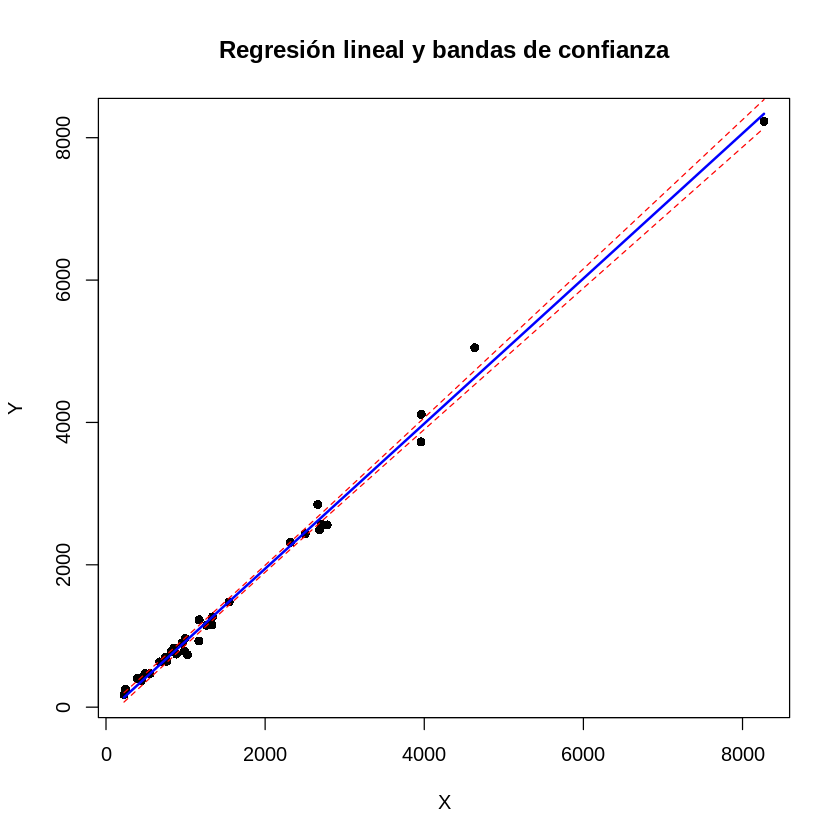

In [ ]:
# Crear el dataframe con los datos
datos <- data.frame(x = x2014, y = x2016)

# Ajustar un modelo de regresión lineal
modelo <- lm(y ~ x, data = datos)

# Obtener la fórmula del error estándar de ŷ
error_estandar_y_hat <- sqrt(sum(modelo$residuals^2) / (length(modelo$residuals) - 2))

# Calcular los límites de las bandas de confianza del 95% para Y
x_range <- seq(min(datos$x), max(datos$x), length.out = 100)
banda_superior <- predict(modelo, newdata = data.frame(x = x_range), interval = "confidence")[, "upr"]
banda_inferior <- predict(modelo, newdata = data.frame(x = x_range), interval = "confidence")[, "lwr"]

# Graficar la regresión y las bandas de confianza
plot(datos$x, datos$y, xlab = "X", ylab = "Y", main = "Regresión lineal y bandas de confianza", pch = 16)
lines(x_range, predict(modelo, newdata = data.frame(x = x_range)), col = "blue", lwd = 2)  # Línea de regresión
lines(x_range, banda_superior, col = "red", lty = 2)  # Banda superior de confianza
lines(x_range, banda_inferior, col = "red", lty = 2)  # Banda inferior de confianza


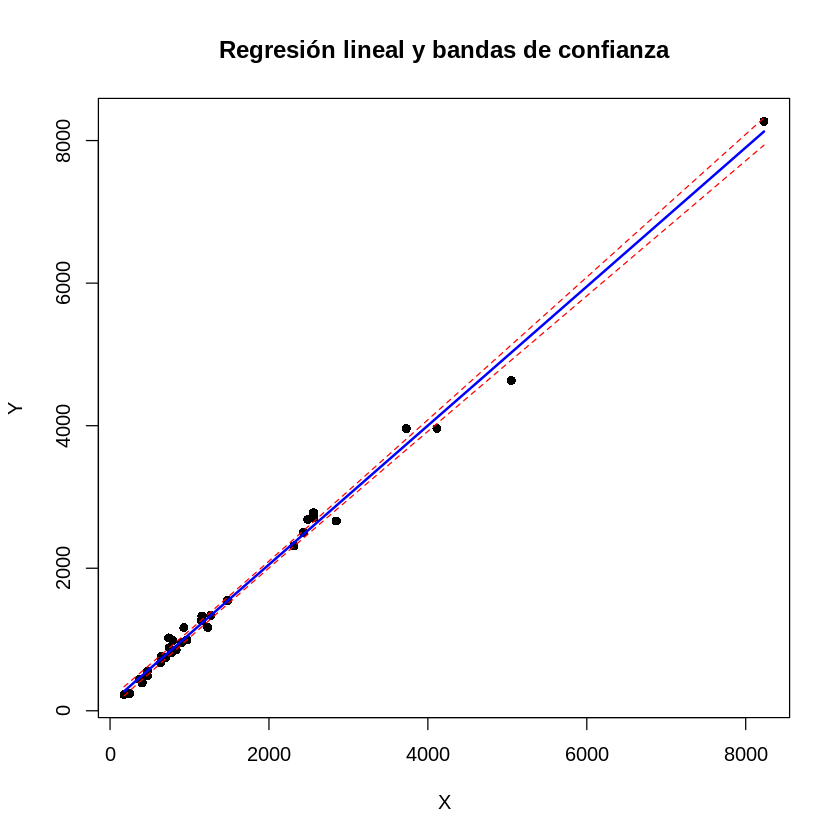

In [ ]:
# Crear el dataframe con los datos
datos <- data.frame(x = x2016, y = x2014)

# Ajustar un modelo de regresión lineal (Y como variable dependiente)
modelo <- lm(y ~ x, data = datos)

# Obtener la fórmula del error estándar de ŷ
error_estandar_y_hat <- sqrt(sum(modelo$residuals^2) / (length(modelo$residuals) - 2))

# Calcular los límites de las bandas de confianza del 95% para Y
x_range <- seq(min(datos$x), max(datos$x), length.out = 100)
banda_superior <- predict(modelo, newdata = data.frame(x = x_range), interval = "confidence")[, "upr"]
banda_inferior <- predict(modelo, newdata = data.frame(x = x_range), interval = "confidence")[, "lwr"]

# Graficar la regresión y las bandas de confianza
plot(datos$x, datos$y, xlab = "X", ylab = "Y", main = "Regresión lineal y bandas de confianza", pch = 16)
lines(x_range, predict(modelo, newdata = data.frame(x = x_range)), col = "blue", lwd = 2)  # Línea de regresión
lines(x_range, banda_superior, col = "red", lty = 2)  # Banda superior de confianza
lines(x_range, banda_inferior, col = "red", lty = 2)  # Banda inferior de confianza


In [ ]:
resumen_modelo <- summary(RLM)

# Obtener el valor F del modelo
valor_F <- resumen_modelo$fstatistic[1]

# Obtener el p-valor asociado al valor F
p_valor <- pf(valor_F, resumen_modelo$fstatistic[2], resumen_modelo$fstatistic[3], lower.tail = FALSE)

# Imprimir el valor F y el p-valor
cat("Valor F:", valor_F, "\n")
cat("P-valor:", p_valor, "\n")

Valor F: 4945.098 
P-valor: 7.34153e-35 


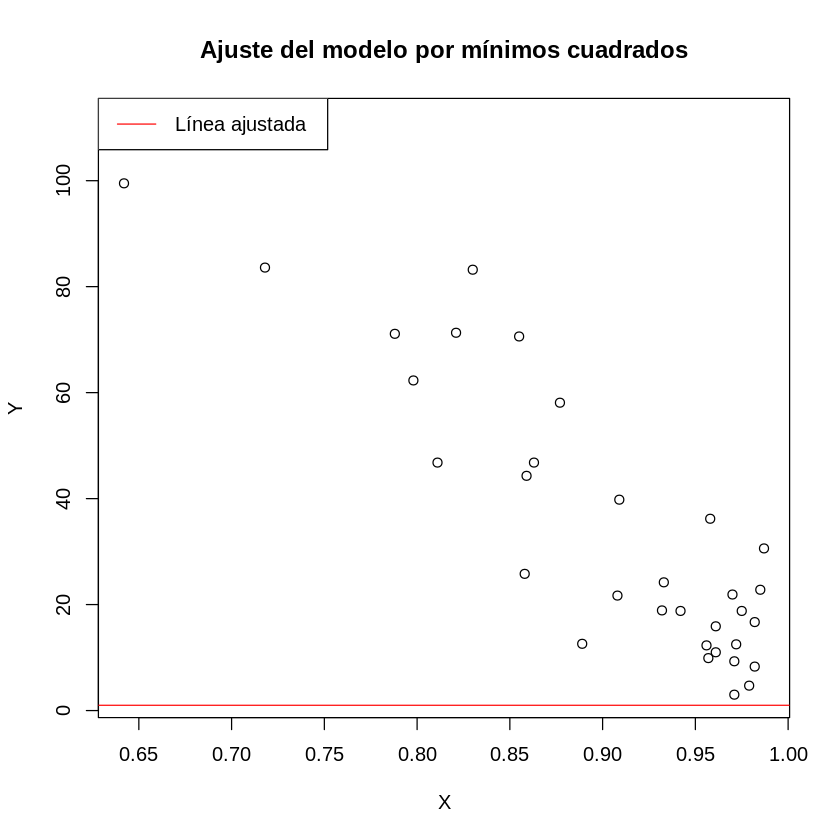

In [ ]:


# Dibujar el scatterplot de los datos
plot(datos_y, datos_x, xlab = "X", ylab = "Y", main = "Ajuste del modelo por mínimos cuadrados")

# Dibujar la línea ajustada en el gráfico
abline(RLM, col = "red")

# Añadir leyenda
legend("topleft", legend = "Línea ajustada", col = "red", lty = 1)

